# Fall 2017 Ast502 - Lecture 9: Density Estimation (Non-Parametric)

## Chapter 6: Sections 6.1-6.2

## Terrance Pat

## Overview
- Motivation for Density Estimation


- Histogram Binning
    - Scott's Rule
    - Freedman-Diaconis Rule
    - Relationship to kernal density estimation


- Basics of non-parametric density estimation
    - Kernel Density Estimation (KDE)
    - Nearest-Neighbor Density Estimation

## Why is Density Estimation Important?
- Many problems obtain their data from sampling continuous distributions.


- Given the data samples, we want to infer what is the underlying probability density function from which the data was drawn and capture every aspect of the density's shape.


- Use the inferred probability density function to generate simulated data distributions to compare against observations.


- Explore the data space for interesting structures that could indicate the detection of unusual or anomalous sources in the context of astronomy.

## What are Histograms?
- 1-D special case of non-parametric density estimation.


- Each bin is a constant estimator of the density of data within that bin.


- How close a histogram fits a distribution is dependent on the number of bins.


- Exact location of bins makes a difference and can affect how the data is interpreted.


- "The main reason why finding the optimal bin size is not straightforward is that the result depends on both the actual data distribution and the choice of metric (such as the mean square error) to be optimized." [4]

## Scott's Rule [3]
- Asymptotically minimizes the mean integrated square error. [1]


- Underlying distribution is assumed to be Gaussian.


$$\Delta_b = {3.5 \sigma \over N^{1/3}}$$

## Freedman-Diaconis Rule [3]
- Extension of Scott's Rule to non-Gaussian distributions.


- Interquartile range is used in place of the sample standard deviation.


$$\Delta_b = {2 (q_{75}-q_{25}) \over N^{1/3}} = {2.7 \sigma_G \over N^{1/3}}$$

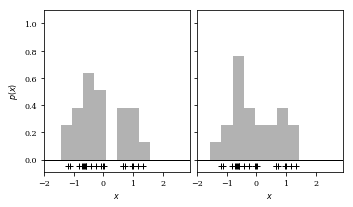

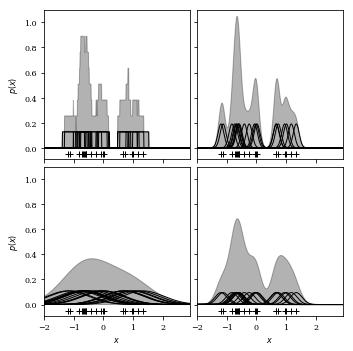

In [1]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Draw the random data
np.random.seed(1)
x = np.concatenate([np.random.normal(-0.5, 0.3, size=14),
                    np.random.normal(1, 0.3, size=7)])


#------------------------------------------------------------
# First figure: silly histogram binning
fig1 = plt.figure(figsize=(5, 3))
fig1.subplots_adjust(left=0.12, right=0.95, wspace=0.05,
                     bottom=0.15, top=0.9, hspace=0.05)

FC = '#6666FF'
XLIM = (-2, 2.9)
YLIM = (-0.09, 1.1)

ax = fig1.add_subplot(121)
bins = np.linspace(-1.8, 2.7, 13)
ax.hist(x, bins=bins, normed=True,
        histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

ax = fig1.add_subplot(122)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.hist(x, bins=bins + 0.25, normed=True,
        histtype='stepfilled', fc='k', alpha=0.3)
ax.plot(XLIM, [0, 0], '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')

#------------------------------------------------------------
# First figure: transition to KDE
fig2 = plt.figure(figsize=(5, 5))
fig2.subplots_adjust(left=0.12, right=0.95, wspace=0.05,
                     bottom=0.1, top=0.95, hspace=0.05)

ax = fig2.add_subplot(221)
ax.xaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = (abs(x_plot - x[:, None]) <= 0.5 * binwidth).astype(float)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')

ax = fig2.add_subplot(222)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.1)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)

ax = fig2.add_subplot(223)
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.7)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, 4 * y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_ylabel('$p(x)$')
ax.set_xlabel('$x$')

ax = fig2.add_subplot(224)
ax.yaxis.set_major_formatter(plt.NullFormatter())
binwidth = bins[1] - bins[0]
x_plot = np.linspace(-4, 4, 1000)
y_plot = binwidth * stats.norm.pdf(x_plot, x[:, None], 0.2)
y_plot /= (binwidth * len(x))
ax.fill(x_plot, y_plot.sum(0), ec='k', lw=1, fc='k', alpha=0.3)
ax.plot(x_plot, y_plot.T, '-k', lw=1)
ax.plot(x, 0 * x - 0.05, '+k')
ax.set_xlim(XLIM)
ax.set_ylim(YLIM)
ax.set_xlabel('$x$')

plt.show()

<img src="tpat_fig_hist_to_kernel_1.png">
- Histogram representations of the same dataset with bin centers offset by $x=0.25$.

## Kernel Density Estimation (KDE)
- Each data point is represented by a smooth kernel function and allowed to overlap with adjacent kernels.


- Serves to effectively smooth the data and show the structure of the underlying probability density function.


- Given a set of measurements {$x_i$}, the kernel density estimator at an arbitrary position $x$ is defined as the following:


$$\hat f_N(x) = {1 \over Nh^D} \sum_{i=1}^{N} {K\bigl({{x-x_i} \over h}\bigl)}$$


- Care must be taken to select the appropriate bandwidth $h$.

- (Top left) Same data set with each point replaced by a bin of unit height and a predetermined width and each bin is allowed to overlap. (Top Right) Each bin is replaced by a Gaussian kernel of narrow bandwidth. (Bottom Left) Using a Gaussian kernel with a large bandwidth. (Bottom Right) Using a Gaussian kernel with a bandwidth in the middle of two extremes.
<img src="tpat_fig_hist_to_kernel_2.png">

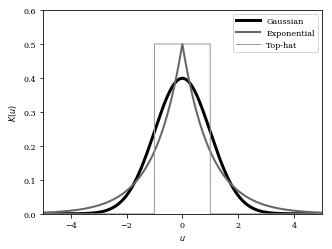

In [2]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Compute Kernels.
x = np.linspace(-5, 5, 10000)
dx = x[1] - x[0]

gauss = (1. / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x ** 2)

exp = 0.5 * np.exp(-abs(x))

tophat = 0.5 * np.ones_like(x)
tophat[abs(x) > 1] = 0

#------------------------------------------------------------
# Plot the kernels
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)

ax.plot(x, gauss, '-', c='black', lw=3, label='Gaussian')
ax.plot(x, exp, '-', c='#666666', lw=2, label='Exponential')
ax.plot(x, tophat, '-', c='#999999', lw=1, label='Top-hat')

ax.legend(loc=1)

ax.set_xlabel('$u$')
ax.set_ylabel('$K(u)$')

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.6001)
plt.show()

## The kernel function is defined with the following properties:
- A smooth function that is positive at all points: ($K(u) \ge 0)$


- Normalizes to unity: ($\int K(u) du = 1)$


- Has a mean of zero: ($\int u K(u) du = 0)$


- Variance is greater than zero: ($\sigma_K^2 = \int u^2 K(u) du \gt 0)$

<img src="tpat_fig_kernels_1.png">
- Example of three kernels used in KDE for the examples within this section in Ivezic' et al.


- Analytical formulas on page 253 of Ivezic' et al.

## Selecting KDE Bandwidth Through Cross-Validation
- For KDE, we considered the likelihood cost using the leave-one-out likelihood cross-validation: $$CV_l(h) = {1 \over N}{\sum_{i=1}^N log (\hat f_{h, -i}(x_i)})$$


- Calculating the optimized bandwidth is done by minimizing $CV_l(h)$ as a function of the bandwidth $h$.

- We can also find the optimized bandwidth by minimizing the mean integrated square error with the following procedure: $$\int (\hat f_h - f)^2 = \int {\hat f_h}^2 - 2\int \hat f_h f + \int f^2$$


$$E\bigl[ \int \hat f_h(x)f(x)dx\bigl] = E\bigl[{1 \over N}{\sum_{i=1}^N \hat f_{h, -i}(x)} \bigl]$$

$$E\bigl[CV_{L_2}(h) + \int f^2\bigl] = E\bigl[MISE(\hat f_h)\bigl]$$


$$=>CV_{L_2}(h) = \int {\hat f_h} ^2 - 2{1 \over N}{\sum_{i=1}^N \hat f_{h, -i}(x_i)}$$

## Convergence of KDE
- Optimal KDE bandwidth decreases at a rate of ~$O(N^{-1/5})$


- Error in KDE using optimal bandwidth converges at a rate of ~$O(N^{-4/5})$


- Optimal kernel function based on minimum variance is the Epanechnikov kernel. (Slide 32 of [4]) $$K(x) = {3 \over 4} (1-x^2), |x| \le 1$$

## Computational Complexity of KDE
- Brute force method scales as ~$O(N^2)$


- Tree algorithms reduce the complexity to ~$O(NlogN)$

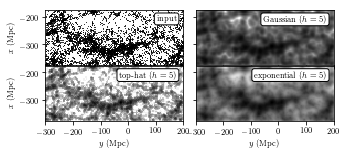

In [3]:
"""
Great Wall KDE
--------------
Figure 6.3

Kernel density estimation for galaxies within the SDSS "Great Wall." The
top-left panel shows points that are galaxies, projected by their spatial
locations (right ascension and distance determined from redshift measurement)
onto the equatorial plane (declination ~ 0 degrees). The remaining panels show
estimates of the density of these points using kernel density estimation with
a Gaussian kernel (upper right), a top-hat kernel (lower left), and an
exponential kernel (lower right). Compare also to figure 6.4.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from scipy.spatial import cKDTree
from scipy.stats import gaussian_kde

from astroML.datasets import fetch_great_wall

# Scikit-learn 0.14 added sklearn.neighbors.KernelDensity, which is a very
# fast kernel density estimator based on a KD Tree.  We'll use this if
# available (and raise a warning if it isn't).
try:
    from sklearn.neighbors import KernelDensity
    use_sklearn_KDE = True
except:
    import warnings
    warnings.warn("KDE will be removed in astroML version 0.3.  Please "
                  "upgrade to scikit-learn 0.14+ and use "
                  "sklearn.neighbors.KernelDensity.", DeprecationWarning)
    from astroML.density_estimation import KDE
    use_sklearn_KDE = False

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch the great wall data
X = fetch_great_wall()

#------------------------------------------------------------
# Create  the grid on which to evaluate the results
Nx = 50
Ny = 125
xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

#------------------------------------------------------------
# Evaluate for several models
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

kernels = ['gaussian', 'tophat', 'exponential']
dens = []

if use_sklearn_KDE:
    kde1 = KernelDensity(5, kernel='gaussian')
    log_dens1 = kde1.fit(X).score_samples(Xgrid)
    dens1 = X.shape[0] * np.exp(log_dens1).reshape((Ny, Nx))

    kde2 = KernelDensity(5, kernel='tophat')
    log_dens2 = kde2.fit(X).score_samples(Xgrid)
    dens2 = X.shape[0] * np.exp(log_dens2).reshape((Ny, Nx))

    kde3 = KernelDensity(5, kernel='exponential')
    log_dens3 = kde3.fit(X).score_samples(Xgrid)
    dens3 = X.shape[0] * np.exp(log_dens3).reshape((Ny, Nx))

else:
    kde1 = KDE(metric='gaussian', h=5)
    dens1 = kde1.fit(X).eval(Xgrid).reshape((Ny, Nx))

    kde2 = KDE(metric='tophat', h=5)
    dens2 = kde2.fit(X).eval(Xgrid).reshape((Ny, Nx))

    kde3 = KDE(metric='exponential', h=5)
    dens3 = kde3.fit(X).eval(Xgrid).reshape((Ny, Nx))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.2))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.01, wspace=0.01)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='equal')
ax1.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: gaussian kernel
ax2 = plt.subplot(222, aspect='equal')
ax2.imshow(dens1.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "Gaussian $(h=5)$", ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: top-hat kernel
ax3 = plt.subplot(223, aspect='equal')
ax3.imshow(dens2.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "top-hat $(h=5)$", ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))
ax3.images[0].set_clim(0.01, 0.8)

# Fourth plot: exponential kernel
ax4 = plt.subplot(224, aspect='equal')
ax4.imshow(dens3.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "exponential $(h=5)$", ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(ymin, ymax - 0.01)
    ax.set_ylim(xmin, xmax)

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('$y$ (Mpc)')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('$x$ (Mpc)')

plt.show()


<img src="tpat_fig_great_wall_KDE_1.png">
- KDE applied to galaxies within the "Great Wall" in SDSS data using various kernel functions.

## KDE with Measurement Errors
- Assume the data is measured with some error $\sigma$ and is homoscedastic.


- For 1-D case, if the data is assumed to be drawn from a true PDF $h(x)$ and the error is described by a distribution $g(x|\sigma)$, then the observed distribution is the convolution of the true PDF and the error distribution: $$f(x) = (h*g)(x) = \int_{-\infty} ^ {\infty}h(x')g(x-x')dx'$$

## Procedure for KDE with Noisy Data:
- Convolution theorem says that a convolution in real space is equivalent to a product in Fourier space.


- Find the kernel density estimate of the observed data, $f(x)$, and compute the Fourier transform $F(k)$.


- Compute the Fourier transform $G(k)$ of the noise distribution g(x).


- Divide the Fourier transform of the observed data's KDE with the Fourier transform of the noise distribution and take the inverse Fourier transform to get the underlying noise-free PDF, i.e. the deconvolved kernel. 

## Nearest-Neighbor Density Estimation
- Estimate the density using distribution of nearest neighbors.


- The point density for a position $x$ in D-dimensions is estimated as the following: $$\hat f_K(x) = {K \over V_D(d_K)}$$

## Practical Considerations for Nearest-Neighbor Density Estimation
- In practice, the point density is simplified to $\hat f_K(x) = {C \over d_K^D}$, where the scaling factor $C$ is calculated by requiring the sum of the product of $\hat f_K(x)$ and the volume created by the distance to the Kth nearest-neighbor is equal to the total number of data points.


- $K$ should be at least 5 since the nearest-neighbor estimator is biased and has a large variance for smaller $K$.


- Error in the point density estimator is $\sigma_f = {K^{1/2} \over V_D(d_K)}$ and the fractional error is ${\sigma_f \over \hat f} = {1 \over K^{1/2}}$ while effective resolution scales with $K^{1/D}$ where $D$ is the dimension.


- Improvements are made by considering the distances to all K nearest neighbors instead of just the Kth nearest-neighbor. This decreases the error in $\hat f$ without decreasing spatial resolution. 


- The point density estimator is $\hat f_K(x) = {C \over \sum_{i=1}^K d_i^D}$ with scaling factor $C = {K(K+1) \over 2V_D(1)}$, both determined from Bayesian analysis.

/usr/local/lib/python2.7/dist-packages/astroML/density_estimation/density_estimation.py:74: UserWarning: The KDE class is deprecated as of version 0.2 and will be removed in version 0.3. Upgrade to scikit-learn version >0.14 and use sklearn.neighbors.KernelDensity instead.
  warnings.warn("The KDE class is deprecated as of version 0.2 and will "


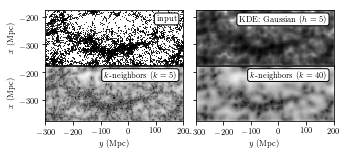

In [4]:
"""
Great Wall Density
------------------
Figure 6.4

Density estimation for galaxies within the SDSS "Great Wall." The upper-left
panel shows points that are galaxies, projected by their spatial locations
onto the equatorial plane (declination ~ 0 degrees). The remaining panels
show estimates of the density of these points using kernel density estimation
(with a Gaussian kernel with width 5Mpc), a K-nearest-neighbor estimator
(eq. 6.15) optimized for a small-scale structure (with K = 5), and a
K-nearest-neighbor estimator optimized for a large-scale structure
(with K = 40).
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from scipy.spatial import cKDTree

from astroML.datasets import fetch_great_wall
from astroML.density_estimation import KDE, KNeighborsDensity

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch the great wall data
X = fetch_great_wall()

#------------------------------------------------------------
# Create  the grid on which to evaluate the results
Nx = 50
Ny = 125
xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

#------------------------------------------------------------
# Evaluate for several models
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T

kde = KDE(metric='gaussian', h=5)
dens_KDE = kde.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn5 = KNeighborsDensity('bayesian', 5)
dens_k5 = knn5.fit(X).eval(Xgrid).reshape((Ny, Nx))

knn40 = KNeighborsDensity('bayesian', 40)
dens_k40 = knn40.fit(X).eval(Xgrid).reshape((Ny, Nx))

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 2.2))
fig.subplots_adjust(left=0.12, right=0.95, bottom=0.2, top=0.9,
                    hspace=0.01, wspace=0.01)

# First plot: scatter the points
ax1 = plt.subplot(221, aspect='equal')
ax1.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')
ax1.text(0.95, 0.9, "input", ha='right', va='top',
         transform=ax1.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Second plot: KDE
ax2 = plt.subplot(222, aspect='equal')
ax2.imshow(dens_KDE.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax2.text(0.95, 0.9, "KDE: Gaussian $(h=5)$", ha='right', va='top',
         transform=ax2.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Third plot: KNN, k=5
ax3 = plt.subplot(223, aspect='equal')
ax3.imshow(dens_k5.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax3.text(0.95, 0.9, "$k$-neighbors $(k=5)$", ha='right', va='top',
         transform=ax3.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

# Fourth plot: KNN, k=40
ax4 = plt.subplot(224, aspect='equal')
ax4.imshow(dens_k40.T, origin='lower', norm=LogNorm(),
           extent=(ymin, ymax, xmin, xmax), cmap=plt.cm.binary)
ax4.text(0.95, 0.9, "$k$-neighbors $(k=40)$", ha='right', va='top',
         transform=ax4.transAxes,
         bbox=dict(boxstyle='round', ec='k', fc='w'))

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlim(ymin, ymax - 0.01)
    ax.set_ylim(xmin, xmax)

for ax in [ax1, ax2]:
    ax.xaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax3, ax4]:
    ax.set_xlabel('$y$ (Mpc)')

for ax in [ax2, ax4]:
    ax.yaxis.set_major_formatter(plt.NullFormatter())

for ax in [ax1, ax3]:
    ax.set_ylabel('$x$ (Mpc)')

plt.show()


<img src="tpat_fig_great_wall_1.png">
- Density estimation for galaxies within the "Great Wall" of SDSS comparing KDE with Gaussian kernel against nearest-neighbor density estimation with different values for $K$.

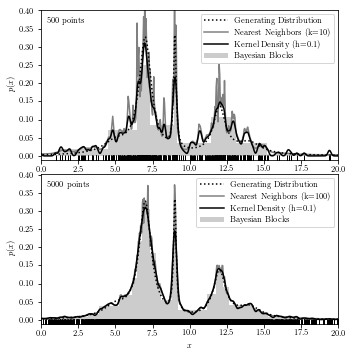

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from astroML.density_estimation import KNeighborsDensity
from astroML.plotting import hist

# Scikit-learn 0.14 added sklearn.neighbors.KernelDensity, which is a very
# fast kernel density estimator based on a KD Tree.  We'll use this if
# available (and raise a warning if it isn't).
try:
    from sklearn.neighbors import KernelDensity
    use_sklearn_KDE = True
except:
    import warnings
    warnings.warn("KDE will be removed in astroML version 0.3.  Please "
                  "upgrade to scikit-learn 0.14+ and use "
                  "sklearn.neighbors.KernelDensity.", DeprecationWarning)
    from astroML.density_estimation import KDE
    use_sklearn_KDE = False

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
#  this is the same data used in the Bayesian Blocks figure
np.random.seed(0)
N = 10000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(bottom=0.08, top=0.95, right=0.95, hspace=0.1)
N_values = (500, 5000)
subplots = (211, 212)
k_values = (10, 100)

for N, k, subplot in zip(N_values, k_values, subplots):
    ax = fig.add_subplot(subplot)
    xN = x[:N]
    t = np.linspace(-10, 30, 1000)

    # Compute density with KDE
    if use_sklearn_KDE:
        kde = KernelDensity(0.1, kernel='gaussian')
        kde.fit(xN[:, None])
        dens_kde = np.exp(kde.score_samples(t[:, None]))
    else:
        kde = KDE('gaussian', h=0.1).fit(xN[:, None])
        dens_kde = kde.eval(t[:, None]) / N

    # Compute density with Bayesian nearest neighbors
    nbrs = KNeighborsDensity('bayesian', n_neighbors=k).fit(xN[:, None])
    dens_nbrs = nbrs.eval(t[:, None]) / N

    # plot the results
    ax.plot(t, true_pdf(t), ':', color='black', zorder=3,
            label="Generating Distribution")
    ax.plot(xN, -0.005 * np.ones(len(xN)), '|k')
    hist(xN, bins='blocks', ax=ax, normed=True, zorder=1,
         histtype='stepfilled', color='k', alpha=0.2,
         label="Bayesian Blocks")
    ax.plot(t, dens_nbrs, '-', lw=1.5, color='gray', zorder=2,
            label="Nearest Neighbors (k=%i)" % k)
    ax.plot(t, dens_kde, '-', color='black', zorder=3,
            label="Kernel Density (h=0.1)")

    # label the plot
    ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)
    ax.set_ylabel('$p(x)$')
    ax.legend(loc='upper right')

    if subplot == 212:
        ax.set_xlabel('$x$')

    ax.set_xlim(0, 20)
    ax.set_ylim(-0.01, 0.4001)

plt.show()

<img src="tpat_fig_density_estimation_1.png">
- Comparison of different density estimation methods applied to two simulated 1-D datasets with different number of samples.

## References:

[1] Scott, David. (2010). Scott's rule. Wiley Interdisciplinary Reviews: Computational Statistics. 2. . 10.1002/wics.103. [Online] Available: https://www.researchgate.net/publication/250594515_Scott%27s_rule

[2] Zeljko Ivezic, Andrew J. Connolly, Jacob T. VanderPlas, and Alexander Gray. "Searching for Structure in Point Data," Statistics, Data Mining, and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of Survey Data, Princeton University Press, Princeton, NJ, USA, 2014, ch. 6, sec. 6.1-6.2, pp 249-260.

[3] Zeljko Ivezic, Andrew J. Connolly, Jacob T. VanderPlas, and Alexander Gray. "Classical Statistical Inference," Statistics, Data Mining, and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of Survey Data, Princeton University Press, Princeton, NJ, USA, 2014, ch. 4, sec. 4.8, pp 164.

[4] https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-9-Tue.pdf